<a href="https://colab.research.google.com/github/kkaisar/introtoML/blob/main/task1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
def mat_mul_loop(A, B: np.array) -> np.array:
    m, n = A.shape
    n, p = B.shape
    C = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C

def mat_mul_inner(A, B: np.array) -> np.array:
    m, n = A.shape
    n, p = B.shape
    C = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            C[i, j] = np.dot(A[i, :], B[:, j])
    return C

def mat_mul_outer(A, B: np.array) -> np.array:
    m, n = A.shape
    n, p = B.shape
    C = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            C[i, j] = sum(A[i, k] * B[k, j] for k in range(n))
    return C

def mat_mul_np(A, B: np.array) -> np.array:
    return A @ B  # Использование оператора умножения матриц


In [5]:
def TestMatrices(n_max):
    for n in range(1, n_max):
        m = np.random.randint(1, n_max)
        p = np.random.randint(1, n_max)
        A = np.random.randn(m, n)
        B = np.random.randn(n, p)
        prod_loop = mat_mul_loop(A, B)
        prod_inner = mat_mul_inner(A, B)
        prod_outer = mat_mul_outer(A, B)
        prod_np = mat_mul_np(A, B)
        assert np.allclose(prod_loop, prod_inner), f"Loop and Inner differ for size {n}"
        assert np.allclose(prod_loop, prod_np), f"Loop and NumPy differ for size {n}"
        assert np.allclose(prod_loop, prod_outer), f"Loop and Outer differ for size {n}"

# Протестируйте реализации
TestMatrices(10)  # Тест для размеров от 1 до 9


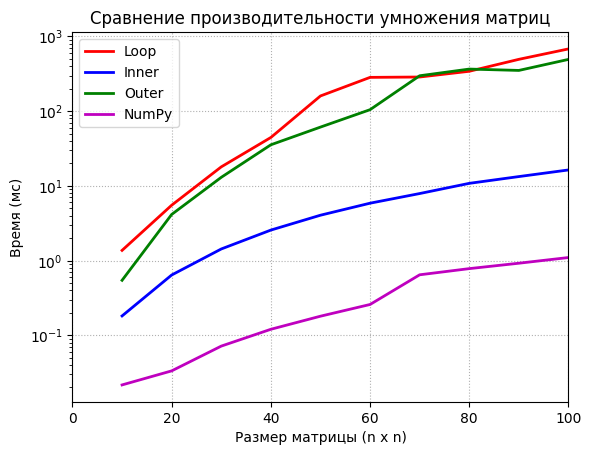

In [6]:
def measure_time(func, m, n, p, n_samples=10):
    result = np.zeros(n_samples)
    for i in range(n_samples):
        begin = time()
        func(np.random.randn(m, n), np.random.randn(n, p))
        result[i] = time() - begin
    return result.mean()

def get_times_lists(func, step=10, max_size=100, n_samples=5):
    times = []
    sizes = np.arange(step, max_size + 1, step)
    for size in sizes:
        times.append(measure_time(func, size, size, size, n_samples))
    return np.array(times)

def plot_time_vs_size(step=10, max_size=100, n_samples=5):
    loop_times = 1000 * get_times_lists(mat_mul_loop, step, max_size, n_samples)
    inner_times = 1000 * get_times_lists(mat_mul_inner, step, max_size, n_samples)
    outer_times = 1000 * get_times_lists(mat_mul_outer, step, max_size, n_samples)
    np_times = 1000 * get_times_lists(mat_mul_np, step, max_size, n_samples)

    sizes = np.arange(step, max_size + 1, step)
    plt.semilogy(sizes, loop_times, c='r', lw=2, label="Loop")
    plt.semilogy(sizes, inner_times, c='b', lw=2, label="Inner")
    plt.semilogy(sizes, outer_times, c='g', lw=2, label="Outer")
    plt.semilogy(sizes, np_times, c='m', lw=2, label="NumPy")

    plt.xlim(0, max_size)
    plt.title("Сравнение производительности умножения матриц")
    plt.legend()
    plt.xlabel("Размер матрицы (n x n)")
    plt.ylabel("Время (мс)")
    plt.grid(ls=":")
    plt.show()

# Запустите измерение производительности и постройте график
plot_time_vs_size(step=10, max_size=100, n_samples=5)
